In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# Загрузка данных


In [40]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [41]:
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
test_data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Подготовка данных


In [44]:
train_data = train_data.drop(
    columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
test_data = test_data.drop(
    columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1)


In [45]:
train_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [46]:
train_data.isna().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## Заполнение пропусков


In [47]:
x = train_data["Age"].mean()
train_data["Age"] = train_data["Age"].fillna(x)


In [48]:
x = train_data["Embarked"].mode()[0]
train_data["Embarked"] = train_data["Embarked"].fillna(x)


In [49]:
train_data.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
train_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [51]:
x = test_data["Age"].mean()
test_data["Age"] = test_data["Age"].fillna(x)
x = test_data["Embarked"].mode()[0]
test_data["Embarked"] = test_data["Embarked"].fillna(x)
x = test_data["Fare"].mean()
test_data["Fare"] = test_data["Fare"].fillna(x)


In [52]:
test_data.isna().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [53]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Преобразование данных


In [54]:
age_scaler = StandardScaler()
age_array = train_data["Age"].values.reshape(-1, 1)
age_scaler.fit(age_array)
train_data["Age"] = age_scaler.transform(age_array)

fare_scaler = StandardScaler()
fare_array = train_data["Fare"].values.reshape(-1, 1)
fare_scaler.fit(fare_array)
train_data["Fare"] = fare_scaler.transform(fare_array)

sibsp_scaler = StandardScaler()
sibsp_array = train_data["SibSp"].values.reshape(-1, 1)
sibsp_scaler.fit(sibsp_array)
train_data["SibSp"] = sibsp_scaler.transform(sibsp_array)

parch_scaler = StandardScaler()
parch_array = train_data["Parch"].values.reshape(-1, 1)
parch_scaler.fit(parch_array)
train_data["Parch"] = parch_scaler.transform(parch_array)

train_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.592481,0.432793,-0.473674,-0.502445,S
1,1,1,female,0.638789,0.432793,-0.473674,0.786845,C
2,1,3,female,-0.284663,-0.474545,-0.473674,-0.488854,S
3,1,1,female,0.407926,0.432793,-0.473674,0.420730,S
4,0,3,male,0.407926,-0.474545,-0.473674,-0.486337,S
...,...,...,...,...,...,...,...,...
886,0,2,male,-0.207709,-0.474545,-0.473674,-0.386671,S
887,1,1,female,-0.823344,-0.474545,-0.473674,-0.044381,S
888,0,3,female,0.000000,0.432793,2.008933,-0.176263,S
889,1,1,male,-0.284663,-0.474545,-0.473674,-0.044381,C


In [55]:
sex_encoder = LabelEncoder()

sex_array = train_data["Sex"]
sex_encoder.fit(sex_array)
train_data["Sex"] = sex_encoder.transform(sex_array)
train_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.592481,0.432793,-0.473674,-0.502445,S
1,1,1,0,0.638789,0.432793,-0.473674,0.786845,C
2,1,3,0,-0.284663,-0.474545,-0.473674,-0.488854,S
3,1,1,0,0.407926,0.432793,-0.473674,0.420730,S
4,0,3,1,0.407926,-0.474545,-0.473674,-0.486337,S
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.207709,-0.474545,-0.473674,-0.386671,S
887,1,1,0,-0.823344,-0.474545,-0.473674,-0.044381,S
888,0,3,0,0.000000,0.432793,2.008933,-0.176263,S
889,1,1,1,-0.284663,-0.474545,-0.473674,-0.044381,C


In [56]:
embarked_encoder = OneHotEncoder()

embarked_array = train_data["Embarked"].values.reshape(-1, 1)
embarked_encoder.fit(embarked_array)
embarked_column_names = embarked_encoder.get_feature_names_out().tolist()
for i in range(0, len(embarked_column_names)):
    embarked_column_names[i] = embarked_column_names[i].replace(
        "x0", "Embarked")
embarked_df = pd.DataFrame(embarked_encoder.transform(
    embarked_array).toarray(), columns=embarked_column_names)
train_data = pd.concat([train_data, embarked_df],
                       axis=1).drop(['Embarked'], axis=1)
train_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.592481,0.432793,-0.473674,-0.502445,0.0,0.0,1.0
1,1,1,0,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,0.0
2,1,3,0,-0.284663,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0
3,1,1,0,0.407926,0.432793,-0.473674,0.420730,0.0,0.0,1.0
4,0,3,1,0.407926,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.207709,-0.474545,-0.473674,-0.386671,0.0,0.0,1.0
887,1,1,0,-0.823344,-0.474545,-0.473674,-0.044381,0.0,0.0,1.0
888,0,3,0,0.000000,0.432793,2.008933,-0.176263,0.0,0.0,1.0
889,1,1,1,-0.284663,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0


In [57]:
pclass_encoder = OneHotEncoder()

pclass_array = train_data["Pclass"].values.reshape(-1, 1)
pclass_encoder.fit(pclass_array)
pclass_column_names = pclass_encoder.get_feature_names_out().tolist()
for i in range(0, len(pclass_column_names)):
    pclass_column_names[i] = pclass_column_names[i].replace("x0", "Pclass")
pclass_df = pd.DataFrame(pclass_encoder.transform(
    pclass_array).toarray(), columns=pclass_column_names)
train_data = pd.concat([train_data, pclass_df],
                       axis=1).drop(['Pclass'], axis=1)
train_data


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,-0.592481,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,-0.284663,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,0.407926,0.432793,-0.473674,0.420730,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,0.407926,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,-0.207709,-0.474545,-0.473674,-0.386671,0.0,0.0,1.0,0.0,1.0,0.0
887,1,0,-0.823344,-0.474545,-0.473674,-0.044381,0.0,0.0,1.0,1.0,0.0,0.0
888,0,0,0.000000,0.432793,2.008933,-0.176263,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,-0.284663,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0


# Обучение моделей


In [62]:
Y = train_data[["Survived"]]
X = train_data.drop(columns=["Survived"], axis=1)
X


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,-0.592481,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,0.0,1.0
1,0,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0,0.0
2,0,-0.284663,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0.407926,0.432793,-0.473674,0.420730,0.0,0.0,1.0,1.0,0.0,0.0
4,1,0.407926,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,1,-0.207709,-0.474545,-0.473674,-0.386671,0.0,0.0,1.0,0.0,1.0,0.0
887,0,-0.823344,-0.474545,-0.473674,-0.044381,0.0,0.0,1.0,1.0,0.0,0.0
888,0,0.000000,0.432793,2.008933,-0.176263,0.0,0.0,1.0,0.0,0.0,1.0
889,1,-0.284663,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0


In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.2, random_state=20)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(712, 11)
(712, 1)
(179, 11)
(179, 1)


In [77]:
ytrain = ytrain.values.ravel()


## Логистическая регрессия


In [64]:
from sklearn.linear_model import LogisticRegression


In [71]:
lr = LogisticRegression()
model = lr.fit(xtrain, ytrain)

train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)


In [72]:
from sklearn.metrics import classification_report

print("Train")
print(classification_report(ytrain, train_pred))
print("Test")
print(classification_report(ytest, test_pred))


Train
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       437
           1       0.77      0.69      0.73       275

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

Test
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       112
           1       0.81      0.69      0.74        67

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



Логистическая регрессия позволяет достичь точности предсказания выживания пассажира равной ~80+-3%.


## KNN


In [78]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


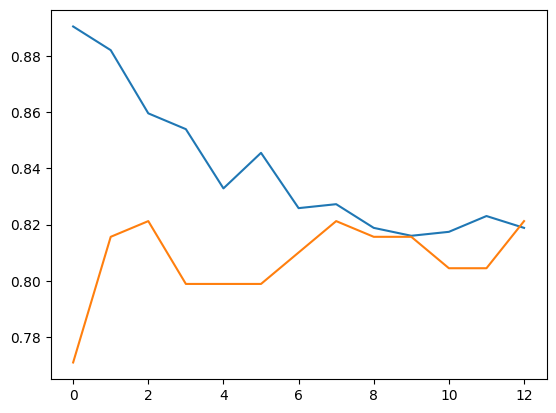

In [81]:
train_accuracy = []
test_accuracy = []
for i in range(2, 15, 1):
    knc = KNeighborsClassifier(n_neighbors=i)
    model = knc.fit(xtrain, ytrain)
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    train_accuracy.append(accuracy_score(ytrain, train_pred))
    test_accuracy.append(accuracy_score(ytest, test_pred))

plt.plot(train_accuracy)
plt.plot(test_accuracy)


Метод KNN достигает максимальной точночти при k=9.


In [82]:
knc = KNeighborsClassifier(n_neighbors=9)
model = knc.fit(xtrain, ytrain)
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)

print("Train")
print(classification_report(ytrain, train_pred))
print("Test")
print(classification_report(ytest, test_pred))


Train
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       437
           1       0.83      0.70      0.76       275

    accuracy                           0.83       712
   macro avg       0.83      0.80      0.81       712
weighted avg       0.83      0.83      0.82       712

Test
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       112
           1       0.81      0.69      0.74        67

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



KNN позволяет достичь точности предсказания выживания пассажира равной ~82%.


## Подбор гиперпараметров


In [84]:
from sklearn.model_selection import RandomizedSearchCV


### Логистическая регрессия


In [96]:
parameters = dict(
    max_iter=list(range(50, 500)),
    solver=['lbfgs', 'newton-cg', 'liblinear'],
    warm_start=[True, False],
    C=np.arange(0, 1, 0.01)
)

randomize_search_lr = RandomizedSearchCV(
    estimator=lr, param_distributions=parameters, cv=5, n_iter=100, n_jobs=-1)

randomize_search_lr.fit(xtrain, ytrain)

print(" Results from Random Search ")
print("\n The best estimator across ALL searched params:\n",
      randomize_search_lr.best_estimator_)
print("\n The best score across ALL searched params:\n",
      randomize_search_lr.best_score_)
print("\n The best parameters across ALL searched params:\n",
      randomize_search_lr.best_params_)


 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=0.07, max_iter=410, solver='newton-cg', warm_start=True)

 The best score across ALL searched params:
 0.8062149118487147

 The best parameters across ALL searched params:
 {'warm_start': True, 'solver': 'newton-cg', 'max_iter': 410, 'C': 0.07}


Train
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       437
           1       0.83      0.70      0.76       275

    accuracy                           0.83       712
   macro avg       0.83      0.80      0.81       712
weighted avg       0.83      0.83      0.82       712

Test
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       112
           1       0.81      0.69      0.74        67

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



### KNN


In [97]:
parameters = dict(
    n_neighbors=list(range(2, 50)),
    leaf_size=list(range(2, 60, 2)),
    p=list(range(1, 4)),
)
knc = KNeighborsClassifier()
randomize_search_knn = RandomizedSearchCV(
    estimator=knc, param_distributions=parameters, cv=5, n_iter=100, n_jobs=-1)

randomize_search_knn.fit(xtrain, ytrain)

print(" Results from Random Search ")
print("\n The best estimator across ALL searched params:\n",
      randomize_search_knn.best_estimator_)
print("\n The best score across ALL searched params:\n",
      randomize_search_knn.best_score_)
print("\n The best parameters across ALL searched params:\n",
      randomize_search_knn.best_params_)


 Results from Random Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(leaf_size=40, n_neighbors=7, p=1)

 The best score across ALL searched params:
 0.8104402639613907

 The best parameters across ALL searched params:
 {'p': 1, 'n_neighbors': 7, 'leaf_size': 40}


In [ ]:
knc = KNeighborsClassifier(n_neighbors=9)
model = knc.fit(xtrain, ytrain)
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)

print("Train")
print(classification_report(ytrain, train_pred))
print("Test")
print(classification_report(ytest, test_pred))